# IMPUTACIÓN DE DATOS

In [164]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import warnings
warnings.simplefilter(action='ignore')

In [165]:
# Cargar el dataset
data_train = pd.read_csv('../data/raw/data_train.csv')
data_test = pd.read_csv('../data/raw/data_test.csv')

In [166]:
variables_imput = ["TRABAJO","ESTADO_CIVIL","EDUCACION","INCUMPLIMIENTO","VIVIENDA","PRESTAMO"]
imputar = SimpleImputer(missing_values = "unknown", strategy = "most_frequent")

In [167]:
data_train[variables_imput] = imputar.fit_transform(data_train[variables_imput])
data_test[variables_imput] = imputar.fit_transform(data_test[variables_imput])

In [168]:
# Imputación variable EDAD
data_train["EDAD"] = np.where(data_train["EDAD"] < 18,18,data_train["EDAD"])
data_train["EDAD"] = np.where(data_train["EDAD"] > 75,75,data_train["EDAD"])
data_train["EDAD"].describe()

count    31478.000000
mean        40.124531
std         10.589760
min         18.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         75.000000
Name: EDAD, dtype: float64

In [169]:
data_test["EDAD"] = np.where(data_test["EDAD"] < 18,18,data_test["EDAD"])
data_test["EDAD"] = np.where(data_test["EDAD"] > 75,75,data_test["EDAD"])
data_test["EDAD"].describe()

count    11747.000000
mean        39.905933
std         10.615925
min         18.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         75.000000
Name: EDAD, dtype: float64

# CODIFICAR VARIABLES CATEGÓRICAS

In [170]:
from sklearn.preprocessing import LabelEncoder

In [171]:
variables_encod = ["TRABAJO", "ESTADO_CIVIL", "EDUCACION", "INCUMPLIMIENTO", "VIVIENDA",
                "PRESTAMO", "TIPO_CONTACTO", "MES", "RESULT_PREVIO"]
etiqueta = LabelEncoder()

In [172]:
data_train[variables_encod] = data_train[variables_encod].apply(lambda col: etiqueta.fit_transform(col))
data_train.head(5)

,ID,EDAD,TRABAJO,ESTADO_CIVIL,EDUCACION,INCUMPLIMIENTO,VIVIENDA,PRESTAMO,TIPO_CONTACTO,MES,...,NRO_DIAS_CONTACTO,CONTACTOS_PREVIOS,RESULT_PREVIO,TASA_VAR_EMP,IPC,ICC,INGRESO,MONTO_DEUDA,MONTO_TRANSAC,ACEPTACION
0,24004,27,6,7,6,0,0,0,1,1,...,999,0,1,-0.1,93.798,-40.4,1285.0,24260.77053,5242.101608,0
1,24003,43,9,7,5,0,0,0,1,1,...,999,0,1,-0.1,93.798,-40.4,1287.0,28980.09457,5538.942316,0
2,23998,44,0,5,3,0,1,0,1,1,...,999,0,1,-0.1,93.798,-40.4,1153.0,10937.49426,7630.664800,0
3,24005,46,0,2,3,0,1,0,1,1,...,999,0,1,-0.1,93.798,-40.4,1125.0,29232.60368,7008.855259,0
4,23999,42,0,5,3,0,1,1,1,1,...,999,0,1,-0.1,93.798,-40.4,1443.0,32636.30279,3012.416629,1


In [173]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,31478.0,20608.759483,11885.434509,1.000000,10246.500000,20626.500000,30875.750000,41188.000000
EDAD,31478.0,40.124531,10.589760,18.000000,32.000000,38.000000,47.000000,75.000000
TRABAJO,31478.0,3.628788,3.545731,0.000000,0.000000,2.000000,7.000000,10.000000
ESTADO_CIVIL,31478.0,5.204079,1.472358,0.000000,5.000000,5.000000,7.000000,8.000000
EDUCACION,31478.0,3.701061,2.081366,0.000000,2.000000,3.000000,6.000000,6.000000
INCUMPLIMIENTO,31478.0,0.000095,0.009762,0.000000,0.000000,0.000000,0.000000,1.000000
VIVIENDA,31478.0,0.547843,0.497714,0.000000,0.000000,1.000000,1.000000,1.000000
PRESTAMO,31478.0,0.150677,0.357739,0.000000,0.000000,0.000000,0.000000,1.000000
TIPO_CONTACTO,31478.0,0.365779,0.481656,0.000000,0.000000,0.000000,1.000000,1.000000
MES,31478.0,6.111062,2.396981,0.000000,6.000000,6.000000,8.000000,9.000000


In [174]:
data_test[variables_encod] = data_test[variables_encod].apply(lambda col: etiqueta.fit_transform(col))
data_test.head(5)

,ID,EDAD,TRABAJO,ESTADO_CIVIL,EDUCACION,INCUMPLIMIENTO,VIVIENDA,PRESTAMO,TIPO_CONTACTO,MES,CAMPANA,NRO_DIAS_CONTACTO,CONTACTOS_PREVIOS,RESULT_PREVIO,TASA_VAR_EMP,IPC,ICC,INGRESO,MONTO_DEUDA,MONTO_TRANSAC
0,24001,56,0,5,6,0,0,0,1,1,1,999,0,1,-0.1,93.798,-40.4,1419.000000,25968.171650,3652.723291
1,18923,37,9,7,5,0,1,0,0,8,1,999,0,1,1.4,93.444,-36.1,1207.534814,15244.427560,1740.932436
2,18928,41,9,5,6,0,1,1,0,8,2,999,0,1,1.4,93.444,-36.1,1132.534814,7554.242833,6245.060454
3,18893,34,9,7,5,0,1,1,1,8,1,999,0,1,1.4,93.444,-36.1,1187.534814,7601.131967,7525.720166
4,18857,37,8,5,5,0,0,0,0,8,1,999,0,1,1.4,93.444,-36.1,1423.534814,23135.673590,7411.758892


In [175]:
data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,11747.0,20665.910530,11845.657418,10.000000,10559.000000,20560.000000,30961.000000,41185.000000
EDAD,11747.0,39.905933,10.615925,18.000000,32.000000,38.000000,47.000000,75.000000
TRABAJO,11747.0,3.644164,3.551434,0.000000,0.000000,2.000000,7.000000,10.000000
ESTADO_CIVIL,11747.0,5.200477,1.486098,0.000000,5.000000,5.000000,7.000000,8.000000
EDUCACION,11747.0,3.707585,2.085042,0.000000,2.000000,3.000000,6.000000,6.000000
INCUMPLIMIENTO,11747.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
VIVIENDA,11747.0,0.546352,0.497868,0.000000,0.000000,1.000000,1.000000,1.000000
PRESTAMO,11747.0,0.155018,0.361938,0.000000,0.000000,0.000000,0.000000,1.000000
TIPO_CONTACTO,11747.0,0.359922,0.479998,0.000000,0.000000,0.000000,1.000000,1.000000
MES,11747.0,6.136460,2.398355,0.000000,6.000000,6.000000,8.000000,9.000000


# CALCULAR WEIGHT OF EVIDENCE (WOE) E INFORMATION VALUE (IV)

In [176]:
# Función para calcular el WOE e IV
def calcular_woe_iv(data_acept, data_no_acept, variable):
    ratio_acept = data_acept.groupby(variable).size() / len(data_acept)
    ratio_no_acept = data_no_acept.groupby(variable).size() / len(data_no_acept)

    woe = np.log(ratio_acept / ratio_no_acept)
    iv = ((ratio_acept - ratio_no_acept) * woe).sum()

    return woe, iv

In [177]:
variables_cat = ["TRABAJO", "ESTADO_CIVIL", "EDUCACION", "INCUMPLIMIENTO", "VIVIENDA", "PRESTAMO", "TIPO_CONTACTO", "MES", "RESULT_PREVIO"]
data_train[variables_cat] = data_train[variables_cat].apply(lambda x: x.astype("category"))
data_test[variables_cat] = data_test[variables_cat].apply(lambda x: x.astype("category"))

In [178]:
data_acept = data_train[data_train["ACEPTACION"] == 1]
data_no_acept = data_train[data_train["ACEPTACION"] == 0]

In [179]:
variable_woe_iv = []
for cat_var in variables_cat:
    woe, iv = calcular_woe_iv(data_acept, data_no_acept, cat_var)
    variable_woe_iv.append((cat_var, woe, iv))

In [180]:
variable_woe_iv.sort(key = lambda x: x[2], reverse = True)

In [181]:
for cat_var, woe, iv in variable_woe_iv:
    print(f"{cat_var} -> {iv}")

INCUMPLIMIENTO -> inf
RESULT_PREVIO -> 0.5666412712803837
MES -> 0.48512158971497626
TIPO_CONTACTO -> 0.24636143458812765
TRABAJO -> 0.2023422757954897
EDUCACION -> 0.04646688460745625
ESTADO_CIVIL -> 0.028815929375380026
VIVIENDA -> 0.0018437007023540978
PRESTAMO -> 2.4030206333931608e-05


In [147]:
# Según las reglas de IV se puede decir:
# Las variables INCUMPLIMIENTO Y RESULT_PREVIO se consideran con valor predictivo sospechosos (IV > 0.5)
# La variable MES muestra un fuerte valor predictivo (IV entre 0.3 y 0.5) pero como es una variable de periodo no la tomaremos en cuenta
# Las variables TIPO_CONTACTO Y TRABAJO son consideradas con un valor predictivo medio (IV entre 0.1 y 0.3)
# las variables EDUCACION Y ESTADO_CIVIL se consideran con valor predictivo debil (IV entre 0.02 y 0.1)
# Las variables VIVIENDA Y PRESTAMO se consideran con no útiles para predicción (IV < 0.02)

# Por lo tanto, las variables seleccionadas para el modelo serán: TIPO_CONTACTO Y TRABAJO

In [182]:
variables_seleccionadas = ["TIPO_CONTACTO", "TRABAJO"]

for var in variables_seleccionadas:
    tupla_seleccionada = [tupla for tupla in variable_woe_iv if tupla[0] == var]
    data_train[var + "_WOE"] = data_train[var].map(tupla_seleccionada[0][1])
    data_test[var + "_WOE"] = data_test[var].map(tupla_seleccionada[0][1])

In [183]:
data_train.head()

,ID,EDAD,TRABAJO,ESTADO_CIVIL,EDUCACION,INCUMPLIMIENTO,VIVIENDA,PRESTAMO,TIPO_CONTACTO,MES,...,RESULT_PREVIO,TASA_VAR_EMP,IPC,ICC,INGRESO,MONTO_DEUDA,MONTO_TRANSAC,ACEPTACION,TIPO_CONTACTO_WOE,TRABAJO_WOE
0,24004,27,6,7,6,0,0,0,1,1,...,1,-0.1,93.798,-40.4,1285.0,24260.77053,5242.101608,0,-0.820859,-0.090038
1,24003,43,9,7,5,0,0,0,1,1,...,1,-0.1,93.798,-40.4,1287.0,28980.09457,5538.942316,0,-0.820859,-0.045331
2,23998,44,0,5,3,0,1,0,1,1,...,1,-0.1,93.798,-40.4,1153.0,10937.49426,7630.664800,0,-0.820859,0.192875
3,24005,46,0,2,3,0,1,0,1,1,...,1,-0.1,93.798,-40.4,1125.0,29232.60368,7008.855259,0,-0.820859,0.192875
4,23999,42,0,5,3,0,1,1,1,1,...,1,-0.1,93.798,-40.4,1443.0,32636.30279,3012.416629,1,-0.820859,0.192875


In [184]:
data_test.head()

,ID,EDAD,TRABAJO,ESTADO_CIVIL,EDUCACION,INCUMPLIMIENTO,VIVIENDA,PRESTAMO,TIPO_CONTACTO,MES,...,CONTACTOS_PREVIOS,RESULT_PREVIO,TASA_VAR_EMP,IPC,ICC,INGRESO,MONTO_DEUDA,MONTO_TRANSAC,TIPO_CONTACTO_WOE,TRABAJO_WOE
0,24001,56,0,5,6,0,0,0,1,1,...,0,1,-0.1,93.798,-40.4,1419.000000,25968.171650,3652.723291,-0.820859,0.192875
1,18923,37,9,7,5,0,1,0,0,8,...,0,1,1.4,93.444,-36.1,1207.534814,15244.427560,1740.932436,0.306363,-0.045331
2,18928,41,9,5,6,0,1,1,0,8,...,0,1,1.4,93.444,-36.1,1132.534814,7554.242833,6245.060454,0.306363,-0.045331
3,18893,34,9,7,5,0,1,1,1,8,...,0,1,1.4,93.444,-36.1,1187.534814,7601.131967,7525.720166,-0.820859,-0.045331
4,18857,37,8,5,5,0,0,0,0,8,...,0,1,1.4,93.444,-36.1,1423.534814,23135.673590,7411.758892,0.306363,1.315154


In [185]:
variables_modelo_train = [i for i in data_train.columns if i not in variables_cat]
variables_modelo_test = [i for i in data_train.columns if i not in variables_cat]

In [186]:
variables_modelo_train.remove("ACEPTACION")
variables_modelo_train.append("ACEPTACION")

In [187]:
print(variables_modelo_train)

['ID', 'EDAD', 'CAMPANA', 'NRO_DIAS_CONTACTO', 'CONTACTOS_PREVIOS', 'TASA_VAR_EMP', 'IPC', 'ICC', 'INGRESO', 'MONTO_DEUDA', 'MONTO_TRANSAC', 'TIPO_CONTACTO_WOE', 'TRABAJO_WOE', 'ACEPTACION']


In [188]:
data_train = data_train[variables_modelo_train]
data_train.head()

,ID,EDAD,CAMPANA,NRO_DIAS_CONTACTO,CONTACTOS_PREVIOS,TASA_VAR_EMP,IPC,ICC,INGRESO,MONTO_DEUDA,MONTO_TRANSAC,TIPO_CONTACTO_WOE,TRABAJO_WOE,ACEPTACION
0,24004,27,1,999,0,-0.1,93.798,-40.4,1285.0,24260.77053,5242.101608,-0.820859,-0.090038,0
1,24003,43,1,999,0,-0.1,93.798,-40.4,1287.0,28980.09457,5538.942316,-0.820859,-0.045331,0
2,23998,44,1,999,0,-0.1,93.798,-40.4,1153.0,10937.49426,7630.664800,-0.820859,0.192875,0
3,24005,46,1,999,0,-0.1,93.798,-40.4,1125.0,29232.60368,7008.855259,-0.820859,0.192875,0
4,23999,42,1,999,0,-0.1,93.798,-40.4,1443.0,32636.30279,3012.416629,-0.820859,0.192875,1


In [189]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,31478.0,20608.759483,11885.434509,1.000000,10246.500000,20626.500000,30875.750000,41188.000000
EDAD,31478.0,40.124531,10.589760,18.000000,32.000000,38.000000,47.000000,75.000000
CAMPANA,31478.0,2.561821,2.748777,1.000000,1.000000,2.000000,3.000000,56.000000
NRO_DIAS_CONTACTO,31478.0,962.339316,187.259314,0.000000,999.000000,999.000000,999.000000,999.000000
CONTACTOS_PREVIOS,31478.0,0.175011,0.497886,0.000000,0.000000,0.000000,0.000000,6.000000
TASA_VAR_EMP,31478.0,0.080227,1.572548,-3.400000,-1.800000,1.100000,1.400000,1.400000
IPC,31478.0,93.575255,0.577415,92.201000,93.075000,93.749000,93.994000,94.767000
ICC,31478.0,-40.493786,4.633156,-50.800000,-42.700000,-41.800000,-36.400000,-26.900000
INGRESO,31478.0,3925.925766,3944.943836,1125.000000,1323.738750,1495.505098,7214.622980,16463.000000
MONTO_DEUDA,31478.0,19979.004011,8406.880028,6346.668502,12281.898450,19912.991845,27675.874565,33653.594950


In [198]:
variables_modelo_test.remove("ACEPTACION")

In [199]:
print(variables_modelo_test)

['ID', 'EDAD', 'CAMPANA', 'NRO_DIAS_CONTACTO', 'CONTACTOS_PREVIOS', 'TASA_VAR_EMP', 'IPC', 'ICC', 'INGRESO', 'MONTO_DEUDA', 'MONTO_TRANSAC', 'TIPO_CONTACTO_WOE', 'TRABAJO_WOE']


In [200]:
data_test.columns

Index(['ID', 'EDAD', 'TRABAJO', 'ESTADO_CIVIL', 'EDUCACION', 'INCUMPLIMIENTO',
       'VIVIENDA', 'PRESTAMO', 'TIPO_CONTACTO', 'MES', 'CAMPANA',
       'NRO_DIAS_CONTACTO', 'CONTACTOS_PREVIOS', 'RESULT_PREVIO',
       'TASA_VAR_EMP', 'IPC', 'ICC', 'INGRESO', 'MONTO_DEUDA', 'MONTO_TRANSAC',
       'TIPO_CONTACTO_WOE', 'TRABAJO_WOE'],
      dtype='object')

In [201]:
data_test = data_test[variables_modelo_test]
data_test.head()

,ID,EDAD,CAMPANA,NRO_DIAS_CONTACTO,CONTACTOS_PREVIOS,TASA_VAR_EMP,IPC,ICC,INGRESO,MONTO_DEUDA,MONTO_TRANSAC,TIPO_CONTACTO_WOE,TRABAJO_WOE
0,24001,56,1,999,0,-0.1,93.798,-40.4,1419.000000,25968.171650,3652.723291,-0.820859,0.192875
1,18923,37,1,999,0,1.4,93.444,-36.1,1207.534814,15244.427560,1740.932436,0.306363,-0.045331
2,18928,41,2,999,0,1.4,93.444,-36.1,1132.534814,7554.242833,6245.060454,0.306363,-0.045331
3,18893,34,1,999,0,1.4,93.444,-36.1,1187.534814,7601.131967,7525.720166,-0.820859,-0.045331
4,18857,37,1,999,0,1.4,93.444,-36.1,1423.534814,23135.673590,7411.758892,0.306363,1.315154


In [202]:
data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,11747.0,20665.910530,11845.657418,10.000000,10559.000000,20560.000000,30961.000000,41185.000000
EDAD,11747.0,39.905933,10.615925,18.000000,32.000000,38.000000,47.000000,75.000000
CAMPANA,11747.0,2.587384,2.815742,1.000000,1.000000,2.000000,3.000000,42.000000
NRO_DIAS_CONTACTO,11747.0,962.407253,187.060223,0.000000,999.000000,999.000000,999.000000,999.000000
CONTACTOS_PREVIOS,11747.0,0.168043,0.487393,0.000000,0.000000,0.000000,0.000000,7.000000
TASA_VAR_EMP,11747.0,0.080625,1.572622,-3.400000,-1.800000,1.100000,1.400000,1.400000
IPC,11747.0,93.575871,0.583473,92.201000,93.075000,93.749000,93.994000,94.767000
ICC,11747.0,-40.541985,4.627576,-50.800000,-42.700000,-41.800000,-36.400000,-26.900000
INGRESO,11747.0,3925.521020,3936.356036,1132.534814,1327.180070,1497.068958,7221.114999,16398.000000
MONTO_DEUDA,11747.0,19959.828363,8385.477847,6350.498943,12248.493645,20027.229320,27536.174560,33653.041810


In [203]:
variables_num = ["EDAD", "CAMPANA", "CONTACTOS_PREVIOS", "TASA_VAR_EMP",
            "IPC", "ICC", "INGRESO", "MONTO_DEUDA", "MONTO_TRANSAC"]

In [204]:
# Exportar el dataset
data_train.to_csv(path_or_buf='../data/processed/data_train.csv',index=False)
data_test.to_csv(path_or_buf='../data/processed/data_test.csv',index=False)

# MODELAMIENTO

In [205]:
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve

In [206]:
model_result = pd.DataFrame(columns=['Modelo','ROC_AUC','Gini'])

In [207]:
X, y = data_train.iloc[:,1:-1], data_train.ACEPTACION
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
X_test = data_test.iloc[:,1:]

In [208]:
# Regresión logística
modelo_logist = LogisticRegression()
modelo_logist.fit(X_train, y_train)

y_pred_logist = modelo_logist.predict_proba(X_val)[:, 1]
roc_auc_logist = roc_auc_score(y_val, y_pred_logist)
fpr_logist, tpr_logist, _ = roc_curve(y_val, y_pred_logist)
gini_logist = roc_auc_logist * 2 - 1
model_result.loc[len(model_result)] = ['Regression Logistic',roc_auc_logist,gini_logist]

print(f"roc_auc: {round(roc_auc_logist, 3)}")
print(f"gini: {round(gini_logist, 3)}")

roc_auc: 0.761
gini: 0.522


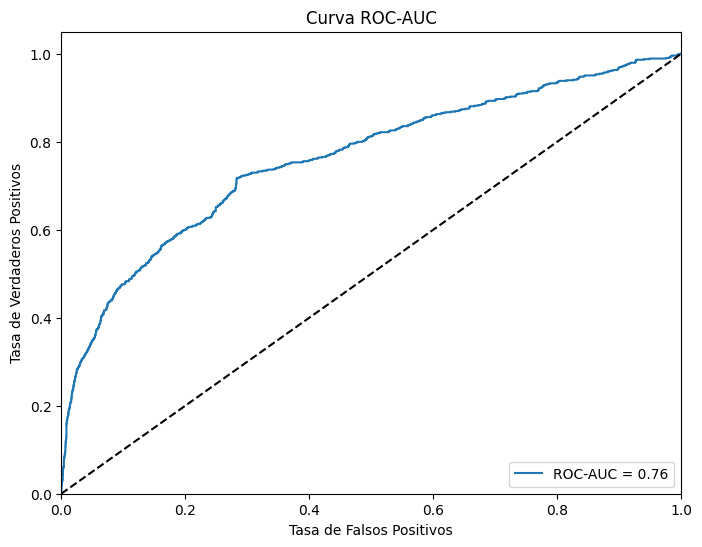

In [209]:
# grafico ROC_AUC para el modelo de Regresión Logística
plt.figure(figsize=(8, 6))
plt.plot(fpr_logist, tpr_logist, label=f'ROC-AUC = {roc_auc_logist:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC-AUC')
plt.legend(loc="lower right")
plt.show()

In [210]:
# Randon Forest
modelo_rf = RandomForestClassifier()
modelo_rf.fit(X_train, y_train)

y_pred_rf = modelo_rf.predict_proba(X_val)[:, 1]
roc_auc_rf = roc_auc_score(y_val, y_pred_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_pred_rf)
gini_rf = roc_auc_rf * 2 - 1
model_result.loc[len(model_result)] = ['Random Forest',roc_auc_rf,gini_rf]

print(f"roc_auc: {round(roc_auc_rf, 3)}")
print(f"gini: {round(gini_rf, 3)}")

roc_auc: 0.779
gini: 0.559


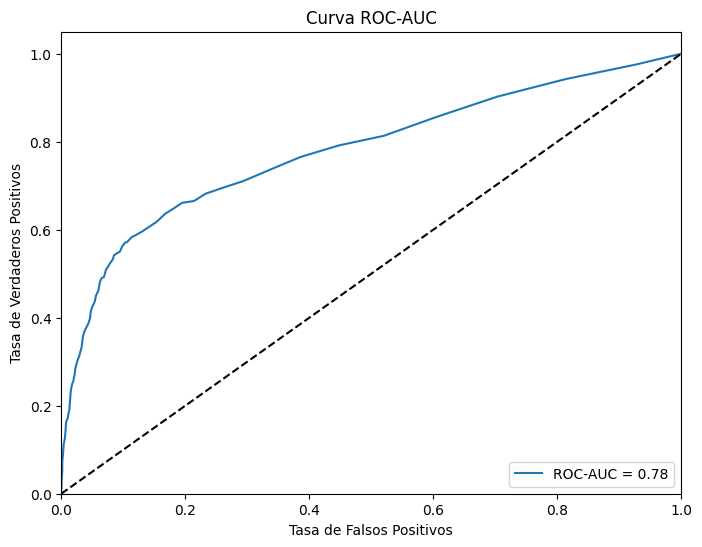

In [211]:
# grafico ROC_AUC para el modelo Randon Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'ROC-AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC-AUC')
plt.legend(loc="lower right")
plt.show()

In [212]:
# Support vector machine
modelo_svm = SVC(probability = True)
modelo_svm.fit(X_train, y_train)

y_pred_svm = modelo_svm.predict_proba(X_val)[:, 1]
roc_auc_svm = roc_auc_score(y_val, y_pred_svm)
fpr_svm, tpr_svm, _ = roc_curve(y_val, y_pred_svm)
gini_svm = roc_auc_svm * 2 - 1
model_result.loc[len(model_result)] = ['Support Vector Machine',roc_auc_svm,gini_svm]

print(f"roc_auc: {round(roc_auc_svm, 3)}")
print(f"gini: {round(gini_svm, 3)}")

roc_auc: 0.67
gini: 0.341


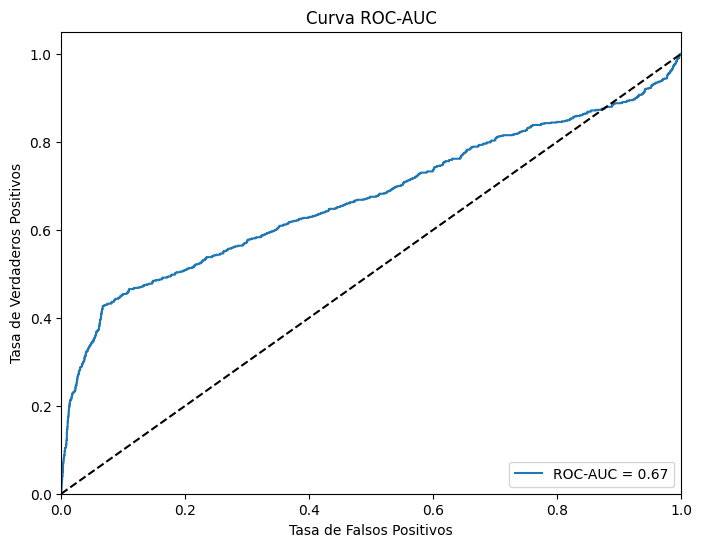

In [213]:
# grafico ROC_AUC para el modelo Support vector machine
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'ROC-AUC = {roc_auc_svm:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC-AUC')
plt.legend(loc="lower right")
plt.show()

In [214]:
# Arboles de decisión
modelo_dtc = DecisionTreeClassifier()
modelo_dtc.fit(X_train, y_train)

y_pred_dtc = modelo_dtc.predict_proba(X_val)[:, 1]
roc_auc_dtc = roc_auc_score(y_val, y_pred_dtc)
fpr_dtc, tpr_dtc, _ = roc_curve(y_val, y_pred_dtc)
gini_dtc = roc_auc_dtc * 2 - 1
model_result.loc[len(model_result)] = ['Árboles de Decisión',roc_auc_dtc,gini_dtc]

print(f"roc_auc: {round(roc_auc_dtc, 3)}")
print(f"gini: {round(gini_dtc, 3)}")

roc_auc: 0.629
gini: 0.257


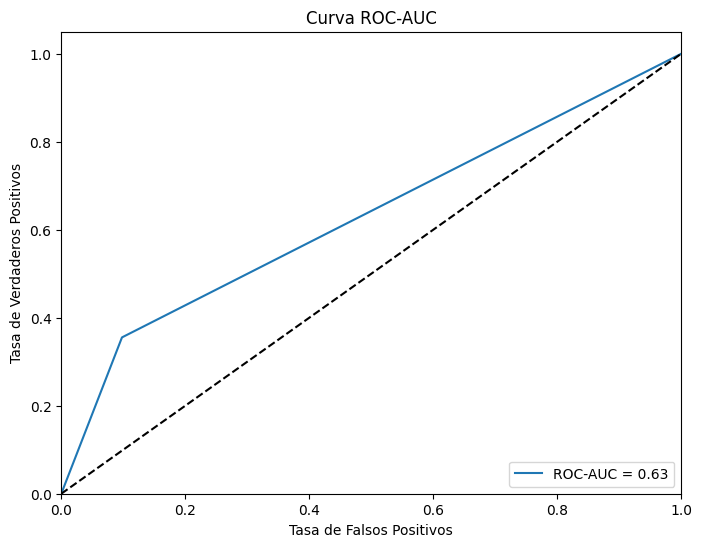

In [215]:
# grafico ROC_AUC para el modelo Arboles de decisión
plt.figure(figsize=(8, 6))
plt.plot(fpr_dtc, tpr_dtc, label=f'ROC-AUC = {roc_auc_dtc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC-AUC')
plt.legend(loc="lower right")
plt.show()

In [216]:
# modelo lightgbm
modelo_lgb = lgb.LGBMClassifier()
modelo_lgb.fit(X_train, y_train)

y_pred_lgb = modelo_lgb.predict_proba(X_val)[:, 1]
roc_auc_lgb = roc_auc_score(y_val, y_pred_lgb)
fpr_lgb, tpr_lgb, _ = roc_curve(y_val, y_pred_lgb)
gini_lgb = roc_auc_lgb * 2 - 1
model_result.loc[len(model_result)] = ['LightGBM',roc_auc_lgb,gini_lgb]

print(f"roc_auc: {round(roc_auc_lgb, 3)}")
print(f"gini: {round(gini_lgb, 3)}")

[LightGBM] [Info] Number of positive: 2805, number of negative: 22377
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 967
[LightGBM] [Info] Number of data points in the train set: 25182, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111389 -> initscore=-2.076630
[LightGBM] [Info] Start training from score -2.076630
roc_auc: 0.79
gini: 0.581


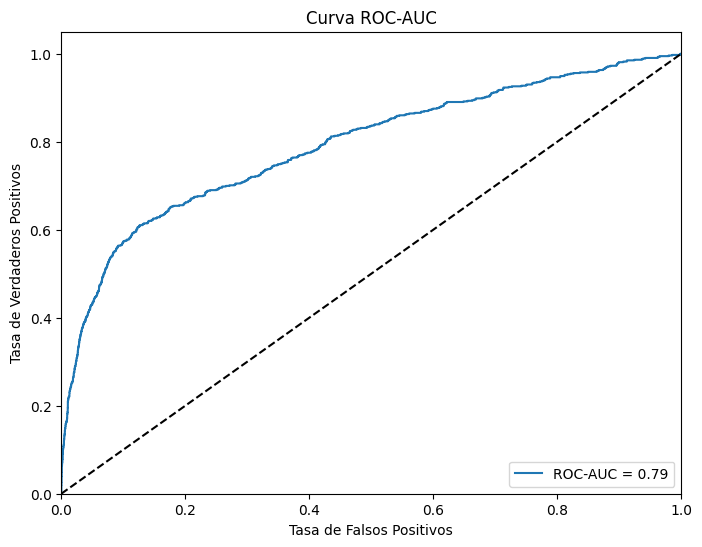

In [217]:
# grafico ROC_AUC para el modelo Lightgbm
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgb, tpr_lgb, label=f'ROC-AUC = {roc_auc_lgb:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC-AUC')
plt.legend(loc="lower right")
plt.show()

In [218]:
model_result

,Modelo,ROC_AUC,Gini
0,Regression Logistic,0.761097,0.522193
1,Random Forest,0.779308,0.558616
2,Support Vector Machine,0.670404,0.340809
3,Árboles de Decisión,0.628691,0.257383
4,LightGBM,0.790408,0.580816
